In [1]:
library(tableone)
library(ggplot2)
library(reshape2)

NameError: name 'library' is not defined

In [37]:
Clinical = data.frame(read.csv("/mnt/e/EWHA/Pancreatic/Clinical.txt", sep="\t"))
Clinical$CA19_9_Base[Clinical$CA19_9_Base == '<5'] = "2.5"
Clinical$CA19_9_Base = as.numeric(Clinical$CA19_9_Base)

Clinical$CEA_Base[Clinical$CEA_Base == 'ND'] = "0.0"
Clinical$CEA_Base[Clinical$CEA_Base == '<3'] = "1.5"
Clinical$CEA_Base = as.numeric(Clinical$CEA_Base)

In [78]:
t(Clinical[Clinical[,'Study_no'] == 'PCAI0020',])

,17
Study_no,PCAI0020
Sex,M
Age,40
P_of_total_ROI,17.0307
Tx_1st,1
size,1.5
pT_8th,1
N_stage,0
cM1,0
Tumor_location,2


In [38]:
nClass = unlist(lapply(Clinical[,-1], function(x) length(unique(x)))) < 5
Category_variables = names(which(nClass))
Numeric_variables = names(which(!nClass))

In [39]:
tableOne <- CreateTableOne(vars = colnames(Clinical)[-1], data = Clinical, factorVars = Category_variables)
print(tableOne, showAllLevels = TRUE)

                            
                             level Overall        
  n                                   141         
  Sex (%)                    F         62 ( 44.0) 
                             M         79 ( 56.0) 
  Age (mean (SD))                   65.99 (9.82)  
  P_of_total_ROI (mean (SD))        33.67 (14.92) 
  Tx_1st (%)                 1        125 ( 88.7) 
                             2          2 (  1.4) 
                             3         13 (  9.2) 
                             5          1 (  0.7) 
  size (mean (SD))                   3.03 (1.49)  
  pT_8th (%)                 1         26 ( 19.0) 
                             2         89 ( 65.0) 
                             3         22 ( 16.1) 
  N_stage (%)                0         43 ( 30.9) 
                             1         77 ( 55.4) 
                             2         19 ( 13.7) 
  cM1 (%)                    0        141 (100.0) 
  Tumor_location (%)         1         77 ( 54.6) 
  

In [54]:
Clinical$SubGroup = "Unknown"
Clinical$SubGroup[(Clinical$PFS_mo < 12) & (Clinical$PFS_event_Up220713==1)] = "Within1Yr"
Clinical$SubGroup[Clinical$PFS_mo > 36] = "Over3Yrs"
Clinical$SubGroup = factor(Clinical$SubGroup, levels=c("Over3Yrs", "Within1Yr", "Unknown"))

In [56]:
CreateTableOne

function (vars, strata, data, factorVars, includeNA = FALSE, 
    test = TRUE, testApprox = chisq.test, argsApprox = list(correct = TRUE), 
    testExact = fisher.test, argsExact = list(workspace = 2 * 
        10^5), testNormal = oneway.test, argsNormal = list(var.equal = TRUE), 
    testNonNormal = kruskal.test, argsNonNormal = list(NULL), 
    smd = TRUE, addOverall = FALSE) 
{
    ModuleStopIfNotDataFrame(data)
    if (missing(vars)) {
        vars <- names(data)
    }
    vars <- ModuleReturnVarsExist(vars, data)
    ModuleStopIfNoVarsLeft(vars)
    varLabels <- labelled::var_label(data[vars])
    if (!missing(factorVars)) {
        factorVars <- ModuleReturnVarsExist(factorVars, data)
        data[factorVars] <- lapply(data[factorVars], factor)
    }
    test <- ModuleReturnFalseIfNoStrata(strata, test)
    smd <- ModuleReturnFalseIfNoStrata(strata, smd)
    percentMissing <- ModulePercentMissing(data[vars])
    varClasses <- lapply(data[vars], class)
    varFactors <- sapply(varClasses, function(VEC) {
        any(VEC %in% c("factor", "ordered", "logical", "character"))
    })
    varFactors <- names(varFactors)[varFactors]
    varNumerics <- sapply(varClasses, function(VEC) {
        any(VEC %in% c("numeric", "integer", "double"))
    })
    varNumerics <- names(varNumerics)[varNumerics]
    varDrop <- setdiff(vars, c(varFactors, varNumerics))
    if (length(varDrop) > 0) {
        warning("Dropping variable(s) ", paste0(varDrop, sep = " "), 
            " due to unsupported class.\n")
        vars <- setdiff(vars, varDrop)
    }
    logiFactors <- vars %in% varFactors
    argsCreateContTable <- list(data = data, test = test, testNormal = testNormal, 
        argsNormal = argsNormal, testNonNormal = testNonNormal, 
        argsNonNormal = argsNonNormal, smd = smd, addOverall = addOverall)
    argsCreateCatTable <- list(data = data, includeNA = includeNA, 
        test = test, testApprox = testApprox, argsApprox = argsApprox, 
        testExact = testExact, argsExact = argsExact, smd = smd, 
        addOverall = addOverall)
    if (!missing(strata)) {
        dfStrata <- ModuleReturnStrata(strata, data)
        strata <- names(dfStrata)
        argsCreateContTable <- c(list(strata = strata), argsCreateContTable)
        argsCreateCatTable <- c(list(strata = strata), argsCreateCatTable)
    }
    if (length(varNumerics) == 0) {
        ContTable <- NULL
        CatTable <- do.call(CreateCatTable, args = c(list(vars = varFactors), 
            argsCreateCatTable))
    }
    else if (length(varFactors) == 0) {
        ContTable <- do.call(CreateContTable, args = c(list(vars = varNumerics), 
            argsCreateContTable))
        CatTable <- NULL
    }
    else if ((length(varFactors) > 0) & (length(varNumerics) > 
        0)) {
        ContTable <- do.call(CreateContTable, args = c(list(vars = varNumerics), 
            argsCreateContTable))
        CatTable <- do.call(CreateCatTable, args = c(list(vars = varFactors), 
            argsCreateCatTable))
    }
    else {
        warning("No variables left to analyzed in vars.")
    }
    TableOneObject <- list(ContTable = ContTable, CatTable = CatTable, 
        MetaData = list(vars = vars, logiFactors = logiFactors, 
            varFactors = varFactors, varNumerics = varNumerics, 
            percentMissing = percentMissing, varLabels = varLabels))
    class(TableOneObject) <- "TableOne"
    return(TableOneObject)
}
<bytecode: 0x5614ec2f4930>
<environment: namespace:tableone>

In [67]:
Clinical2 = data.frame(Clinical[Clinical$SubGroup != 'Unknown',])
Clinical2$SubGroup = factor(Clinical2$SubGroup)

In [73]:
options(width=240)
tableOne <- CreateTableOne(vars = colnames(Clinical)[-1], data = Clinical2, strata='SubGroup', factorVars = Category_variables)
print(tableOne, showAllLevels = TRUE)

                            Stratified by SubGroup
                             level     Over3Yrs        Within1Yr        p      test
  n                                        28              39                      
  Sex (%)                    F             15 ( 53.6)      16 ( 41.0)    0.443     
                             M             13 ( 46.4)      23 ( 59.0)              
  Age (mean (SD))                       67.29 (9.90)    68.23 (10.81)    0.716     
  P_of_total_ROI (mean (SD))            30.74 (14.76)   36.74 (13.04)    0.083     
  Tx_1st (%)                 1             28 (100.0)      38 ( 97.4)    1.000     
                             5              0 (  0.0)       1 (  2.6)              
  size (mean (SD))                       2.27 (0.73)     3.55 (1.64)    <0.001     
  pT_8th (%)                 1             11 ( 40.7)       3 (  8.1)    0.001     
                             2             16 ( 59.3)      24 ( 64.9)              
                         

<br><br><br><br><br><br><br><br><br><br><br><br>
# TCGA Clinical dataset

In [232]:
library(survival)

In [233]:
TCGA_clinical <- read.csv("/mnt/e/TCGA/PAAD/clinical/clinical.tsv", sep="\t")
TCGA_clinical[TCGA_clinical == '\'--'] = NA
TCGA_clinical <- TCGA_clinical[,!colSums(is.na(TCGA_clinical)) > 320]
TCGA_clinical = TCGA_clinical[, c("case_submitter_id", "days_to_death", "gender", "race", "vital_status", "age_at_diagnosis", 
                  "ajcc_pathologic_t", "ajcc_pathologic_n", "ajcc_pathologic_m", "ajcc_pathologic_stage", "ajcc_staging_system_edition",
                  "days_to_last_follow_up", "morphology", "primary_diagnosis", "prior_malignancy", "prior_treatment", "site_of_resection_or_biopsy",
                  "tissue_or_organ_of_origin")]
TCGA_clinical <- TCGA_clinical[!duplicated(TCGA_clinical),]
TCGA_clinical$ajcc_pathologic_stage = gsub("B", "", gsub("A", "", TCGA_clinical$ajcc_pathologic_stage))
svs <- dir("/mnt/e/TCGA/PAAD/svs")

In [234]:
TCGA_clinical$Time = TCGA_clinical$days_to_last_follow_up
TCGA_clinical$Time[TCGA_clinical$vital_status == "Dead"] = TCGA_clinical$days_to_death[TCGA_clinical$vital_status == "Dead"]
TCGA_clinical <- TCGA_clinical[, !colnames(TCGA_clinical) %in% c("days_to_last_follow_up", "days_to_death")]

In [235]:
Variables <- c("gender", "race", "age_at_diagnosis", "ajcc_pathologic_t", "ajcc_pathologic_n", "ajcc_pathologic_m",
  "ajcc_pathologic_stage", "ajcc_staging_system_edition", "morphology", "primary_diagnosis", "prior_malignancy", 
  "prior_treatment", "site_of_resection_or_biopsy", "tissue_or_organ_of_origin")
col_idx = which(colnames(TCGA_clinical) %in% Variables)

In [236]:
dim(TCGA_clinical)

[1] 185  17

In [237]:
SurvivalData = Surv(as.numeric(TCGA_clinical$Time), TCGA_clinical$vital_status == "Dead")

In [255]:
i = i+1
table(TCGA_clinical[, col_idx[i]])


              Body of pancreas               Head of pancreas 
                            15                            137 
Overlapping lesion of pancreas                  Pancreas, NOS 
                             2                             17 
              Tail of pancreas 
                            14 

In [259]:
table(rowSums(is.na(TCGA_clinical)))


  0   1   2 
181   3   1 

In [241]:
coxRes <- list()
for(i in 1:length(col_idx)) coxRes[[i]] <- coef(summary(coxph(SurvivalData ~ TCGA_clinical[, col_idx[i]], data=TCGA_clinical)))
do.call(rbind, coxRes)

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  4 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  1,3,4,5 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  2,5 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; coefficient may be infinite. ”
Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; coefficient may be infinite. ”


,coef,exp(coef),se(coef),z,Pr(>|z|)
"TCGA_clinical[, col_idx[i]]male",-0.181417448,8.340871e-01,2.005439e-01,-9.046272e-01,0.365662932
"TCGA_clinical[, col_idx[i]]black or african american",0.426609925,1.532055e+00,6.341376e-01,6.727403e-01,0.501112526
"TCGA_clinical[, col_idx[i]]not reported",0.511943802,1.668531e+00,6.728166e-01,7.608965e-01,0.446718865
"TCGA_clinical[, col_idx[i]]white",0.270814844,1.311032e+00,4.613724e-01,5.869767e-01,0.557219343
"TCGA_clinical[, col_idx[i]]",0.000076767,1.000077e+00,2.737976e-05,2.803786e+00,0.005050640
"TCGA_clinical[, col_idx[i]]T2",0.371220698,1.449503e+00,7.861813e-01,4.721820e-01,0.636796865
"TCGA_clinical[, col_idx[i]]T3",1.058054891,2.880762e+00,7.201360e-01,1.469243e+00,0.141766864
"TCGA_clinical[, col_idx[i]]T4",0.741305155,2.098673e+00,1.006077e+00,7.368271e-01,0.461227492
"TCGA_clinical[, col_idx[i]]TX",-15.173792005,2.571022e-07,2.592924e+03,-5.852001e-03,0.995330805
"TCGA_clinical[, col_idx[i]]N1",0.777238523,2.175456e+00,2.581473e-01,3.010834e+00,0.002605312


In [240]:
SurvivalData = Surv(as.numeric(TCGA_clinical$Time), TCGA_clinical$vital_status == "Dead")

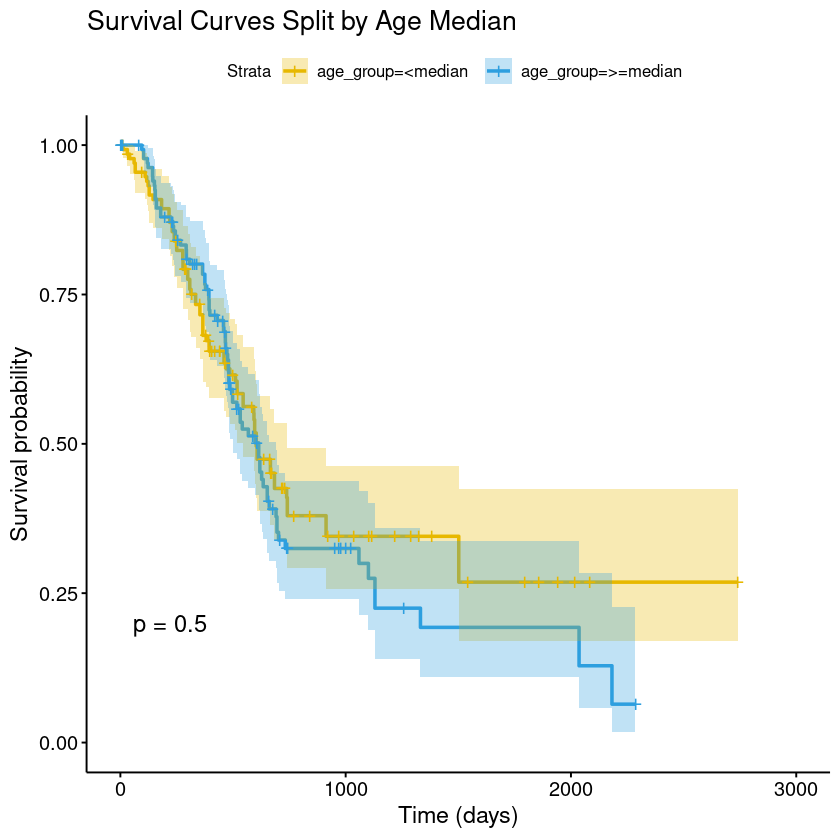

In [200]:
tmp_clinical <- TCGA_clinical
tmp_clinical$age_group <- ifelse(tmp_clinical$age_at_diagnosis >= sort(tmp_clinical$age_at_diagnosis), ">=median", "<median")

# 생존 분석 모델
fit <- survfit(SurvivalData ~ age_group, data = tmp_clinical)

# 그래프 그리기
ggsurvplot(fit, data = tmp_clinical, pval = TRUE, conf.int = TRUE,
           palette = c("#E7B800", "#2E9FDF"),
           xlab = "Time (days)", ylab = "Survival probability",
           title = "Survival Curves Split by Age Median")